In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
#read in data
deaths = pd.read_csv(r"/Users/trinitybibler/Downloads/drug_deaths.csv")

In [6]:
#summary statistics of data
deaths.describe()

,Unnamed: 0,deaths_20,deaths_19,deaths_18,deaths_17,deaths_16
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,26.000000,1345.686275,977.647059,917.686275,933.274510,828.372549
std,14.866069,1399.674226,1005.368824,933.433458,971.678508,846.704080
min,1.000000,46.000000,39.000000,28.000000,35.000000,42.000000
25%,13.500000,325.500000,241.500000,199.500000,225.000000,181.500000
50%,26.000000,945.000000,558.000000,444.000000,456.000000,466.000000
75%,38.500000,1981.000000,1393.500000,1250.000000,1255.000000,1158.000000
max,51.000000,5508.000000,3771.000000,3237.000000,4293.000000,3613.000000


In [7]:
#encode categorical variable
deaths = pd.get_dummies(deaths)

In [8]:
#create arrays from data
l = np.array(deaths['deaths_20'])
deaths = deaths.drop('deaths_20', axis = 1)
death_list = list(deaths.columns)
deaths = np.array(deaths)

In [123]:
#split data for use 
train_deaths, test_deaths, train_l, test_l = train_test_split(deaths, l, test_size = 0.20, random_state = 0)

In [124]:
print(train_deaths.shape)
print(train_l.shape)
print(test_deaths.shape)
print(test_l.shape)

(40, 56)
(40,)
(11, 56)
(11,)


In [125]:
#establish baseline
baseline_pred = test_deaths[:, death_list.index('deaths_19')]
baseline_error = abs(baseline_pred - test_l)
print('Baseline error: ', round(np.mean(baseline_error), 2))

Baseline error:  357.18


In [126]:
from sklearn.ensemble import RandomForestRegressor

In [127]:
#train model
rf = RandomForestRegressor(n_estimators = 10000, random_state = 0, max_depth = 20)
rf.fit(train_deaths, train_l)

RandomForestRegressor(max_depth=20, n_estimators=10000, random_state=0)

In [128]:
#calculate predictions
pred = rf.predict(test_deaths)
errors = abs(pred - test_l)
print('Mean abs error: ', round(np.mean(errors), 2))

Mean abs error:  125.97


In [129]:
#calculate accuracy of model
mape = 100 * (errors / test_l)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.01 %.


In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
data = pd.DataFrame(data = { 'deaths' : l})

In [136]:
pred_data = pd.DataFrame(data = {'pred_deaths': pred})

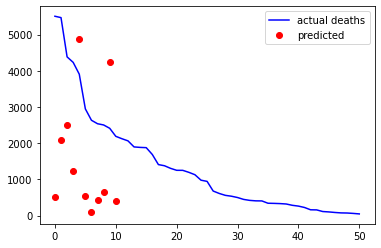

In [134]:
#plot data 
plt.plot(data['deaths'], 'b-', label = 'actual deaths')
plt.plot(pred_data['pred_deaths'], 'ro', label = 'predicted')

plt.legend()

In [ ]:
#code references: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0